In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Date/time utilities
from datetime import datetime

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Warehouse connection (choose your engine)
from sqlalchemy import create_engine


In [2]:
POSTGRES_USER = "nishantsingh"
POSTGRES_PASS = "MViOfwCs2ZrSVoV3"
POSTGRES_HOST = "data-analytics-course-2.c8g8r1deus2v.eu-central-1.rds.amazonaws.com"
POSTGRES_PORT = "5432"
POSTGRES_DB = "jalapeno_joins"
POSTGRES_SCHEMA = "s_nishantsingh"


# Loading and Cleaning the data set in the Pandas

In [3]:
# Marketing Funnel datasets
mqls = pd.read_csv("../data_raw/olist_marketing_qualified_leads_dataset.csv")
closed_deals = pd.read_csv("../data_raw/olist_closed_deals_dataset.csv")

# E‑commerce datasets
orders = pd.read_csv("../data_raw/olist_orders_dataset.csv")
order_items = pd.read_csv("../data_raw/olist_order_items_dataset.csv")
customers = pd.read_csv("../data_raw/olist_customers_dataset.csv")
sellers = pd.read_csv("../data_raw/olist_sellers_dataset.csv")
products = pd.read_csv("../data_raw/olist_products_dataset.csv")
payments = pd.read_csv("../data_raw/olist_order_payments_dataset.csv")
reviews = pd.read_csv("../data_raw/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("../data_raw/olist_geolocation_dataset.csv")
category_translation = pd.read_csv("../data_raw/product_category_name_translation.csv")


In [4]:
print(mqls.shape)
print(closed_deals.shape)
print(orders.shape)
print(order_items.shape)


(8000, 4)
(842, 14)
(99441, 8)
(112650, 7)


In [5]:
def clean_dataframe(df):
    # Standardize column names
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w_]", "", regex=True)
    )
    return df


In [6]:
# Apply column cleaning
mqls = clean_dataframe(mqls)
closed_deals = clean_dataframe(closed_deals)
orders = clean_dataframe(orders)
order_items = clean_dataframe(order_items)
customers = clean_dataframe(customers)
sellers = clean_dataframe(sellers)
products = clean_dataframe(products)
payments = clean_dataframe(payments)
reviews = clean_dataframe(reviews)
geolocation = clean_dataframe(geolocation)
category_translation = clean_dataframe(category_translation)


In [7]:
# Marketing funnel
mqls['first_contact_date'] = pd.to_datetime(mqls['first_contact_date'], errors='coerce')
closed_deals['won_date'] = pd.to_datetime(closed_deals['won_date'], errors='coerce')

# Orders
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')

# Reviews
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], errors='coerce')
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], errors='coerce')


In [8]:
def null_summary(df, name):
    print(f"\n{name} — Missing values:")
    print(df.isnull().sum().sort_values(ascending=False))

# Example
null_summary(mqls, "MQLs")
null_summary(orders, "Orders")



MQLs — Missing values:
origin                60
mql_id                 0
first_contact_date     0
landing_page_id        0
dtype: int64

Orders — Missing values:
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64


# Exploratory Data Analysis

In [9]:
def run_basic_eda(df, name):
    print(f"\n===== {name.upper()} — SHAPE =====")
    print(df.shape)

    print(f"\n===== {name.upper()} — INFO =====")
    display(df.info())

    print(f"\n===== {name.upper()} — HEAD =====")
    display(df.head())

    print(f"\n===== {name.upper()} — MISSING VALUES =====")
    display(df.isnull().sum().sort_values(ascending=False))

    print(f"\n===== {name.upper()} — DESCRIPTIVE STATS (NUMERIC) =====")
    display(df.describe())

    print(f"\n===== {name.upper()} — DESCRIPTIVE STATS (CATEGORICAL) =====")
    display(df.describe(include='object'))


In [10]:
run_basic_eda(mqls, "MQLs")
run_basic_eda(closed_deals, "Closed Deals")
run_basic_eda(orders, "Orders")
run_basic_eda(order_items, "Order Items")
run_basic_eda(customers, "Customers")
run_basic_eda(sellers, "Sellers")
run_basic_eda(products, "Products")
run_basic_eda(payments, "Payments")
run_basic_eda(reviews, "Reviews")
run_basic_eda(geolocation, "Geolocation")



===== MQLS — SHAPE =====
(8000, 4)

===== MQLS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


None


===== MQLS — HEAD =====


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search



===== MQLS — MISSING VALUES =====


origin                60
mql_id                 0
first_contact_date     0
landing_page_id        0
dtype: int64


===== MQLS — DESCRIPTIVE STATS (NUMERIC) =====


,first_contact_date
count,8000
mean,2018-02-05 14:19:51.600000256
min,2017-06-14 00:00:00
25%,2017-12-31 00:00:00
50%,2018-02-25 00:00:00
75%,2018-04-15 06:00:00
max,2018-05-31 00:00:00



===== MQLS — DESCRIPTIVE STATS (CATEGORICAL) =====


,mql_id,landing_page_id,origin
count,8000,8000,7940
unique,8000,495,10
top,dac32acd4db4c29c230538b72f8dd87d,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,912,2296



===== CLOSED DEALS — SHAPE =====
(842, 14)

===== CLOSED DEALS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_s

None


===== CLOSED DEALS — HEAD =====


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0



===== CLOSED DEALS — MISSING VALUES =====


has_company                      779
has_gtin                         778
average_stock                    776
declared_product_catalog_size    773
lead_behaviour_profile           177
business_type                     10
lead_type                          6
business_segment                   1
won_date                           0
seller_id                          0
mql_id                             0
sr_id                              0
sdr_id                             0
declared_monthly_revenue           0
dtype: int64


===== CLOSED DEALS — DESCRIPTIVE STATS (NUMERIC) =====


,won_date,declared_product_catalog_size,declared_monthly_revenue
count,842,69.000000,8.420000e+02
mean,2018-04-23 06:04:00.891923968,233.028986,7.337768e+04
min,2017-12-05 02:00:00,1.000000,0.000000e+00
25%,2018-03-07 12:48:36.249999872,30.000000,0.000000e+00
50%,2018-04-13 21:22:15,100.000000,0.000000e+00
75%,2018-05-21 17:38:27.500000,300.000000,0.000000e+00
max,2018-11-14 18:04:19,2000.000000,5.000000e+07
std,NaN,352.380558,1.744799e+06



===== CLOSED DEALS — DESCRIPTIVE STATS (CATEGORICAL) =====


,mql_id,seller_id,sdr_id,sr_id,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type
count,842,842,842,842,841,836,665,63,64,66,832
unique,842,842,32,22,33,8,9,2,2,6,3
top,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,home_decor,online_medium,cat,True,True,5-20,reseller
freq,1,1,140,133,105,332,407,58,54,22,587



===== ORDERS — SHAPE =====
(99441, 8)

===== ORDERS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None


===== ORDERS — HEAD =====


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26



===== ORDERS — MISSING VALUES =====


order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64


===== ORDERS — DESCRIPTIVE STATS (NUMERIC) =====


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00



===== ORDERS — DESCRIPTIVE STATS (CATEGORICAL) =====


,order_id,customer_id,order_status
count,99441,99441,99441
unique,99441,99441,8
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
freq,1,1,96478



===== ORDER ITEMS — SHAPE =====
(112650, 7)

===== ORDER ITEMS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


===== ORDER ITEMS — HEAD =====


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



===== ORDER ITEMS — MISSING VALUES =====


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


===== ORDER ITEMS — DESCRIPTIVE STATS (NUMERIC) =====


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000



===== ORDER ITEMS — DESCRIPTIVE STATS (CATEGORICAL) =====


,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48
freq,21,527,2033,21



===== CUSTOMERS — SHAPE =====
(99441, 5)

===== CUSTOMERS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


===== CUSTOMERS — HEAD =====


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



===== CUSTOMERS — MISSING VALUES =====


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


===== CUSTOMERS — DESCRIPTIVE STATS (NUMERIC) =====


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000



===== CUSTOMERS — DESCRIPTIVE STATS (CATEGORICAL) =====


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746



===== SELLERS — SHAPE =====
(3095, 4)

===== SELLERS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None


===== SELLERS — HEAD =====


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



===== SELLERS — MISSING VALUES =====


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


===== SELLERS — DESCRIPTIVE STATS (NUMERIC) =====


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000



===== SELLERS — DESCRIPTIVE STATS (CATEGORICAL) =====


,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849



===== PRODUCTS — SHAPE =====
(32951, 9)

===== PRODUCTS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


===== PRODUCTS — HEAD =====


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



===== PRODUCTS — MISSING VALUES =====


product_category_name         610
product_description_lenght    610
product_name_lenght           610
product_photos_qty            610
product_weight_g                2
product_height_cm               2
product_length_cm               2
product_width_cm                2
product_id                      0
dtype: int64


===== PRODUCTS — DESCRIPTIVE STATS (NUMERIC) =====


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



===== PRODUCTS — DESCRIPTIVE STATS (CATEGORICAL) =====


,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029



===== PAYMENTS — SHAPE =====
(103886, 5)

===== PAYMENTS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


===== PAYMENTS — HEAD =====


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



===== PAYMENTS — MISSING VALUES =====


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


===== PAYMENTS — DESCRIPTIVE STATS (NUMERIC) =====


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000



===== PAYMENTS — DESCRIPTIVE STATS (CATEGORICAL) =====


,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795



===== REVIEWS — SHAPE =====
(99224, 7)

===== REVIEWS — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


None


===== REVIEWS — HEAD =====


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53



===== REVIEWS — MISSING VALUES =====


review_comment_title       87656
review_comment_message     58247
review_id                      0
review_score                   0
order_id                       0
review_creation_date           0
review_answer_timestamp        0
dtype: int64


===== REVIEWS — DESCRIPTIVE STATS (NUMERIC) =====


,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN



===== REVIEWS — DESCRIPTIVE STATS (CATEGORICAL) =====


,review_id,order_id,review_comment_title,review_comment_message
count,99224,99224,11568,40977
unique,98410,98673,4527,36159
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,Recomendo,Muito bom
freq,3,3,423,230



===== GEOLOCATION — SHAPE =====
(1000163, 5)

===== GEOLOCATION — INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None


===== GEOLOCATION — HEAD =====


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



===== GEOLOCATION — MISSING VALUES =====


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


===== GEOLOCATION — DESCRIPTIVE STATS (NUMERIC) =====


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02



===== GEOLOCATION — DESCRIPTIVE STATS (CATEGORICAL) =====


,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


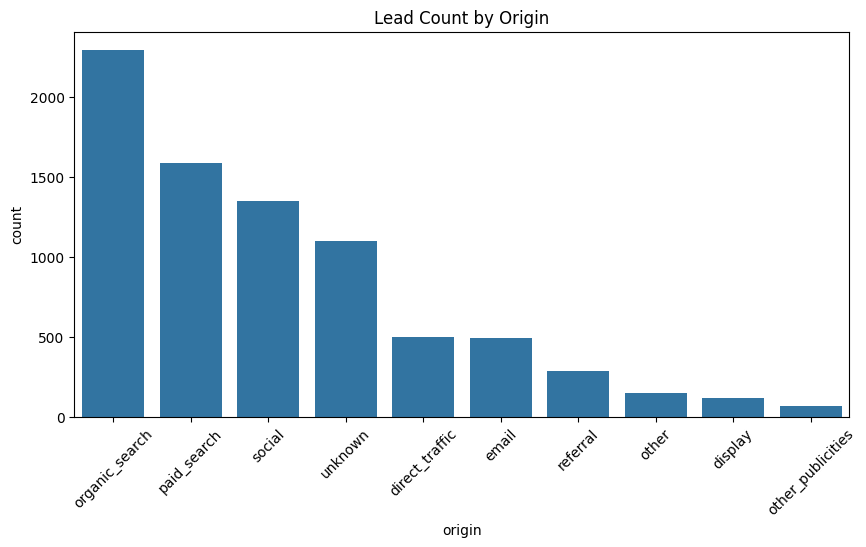

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=mqls, x='origin', order=mqls['origin'].value_counts().index)
plt.title("Lead Count by Origin")
plt.xticks(rotation=45)
plt.show()


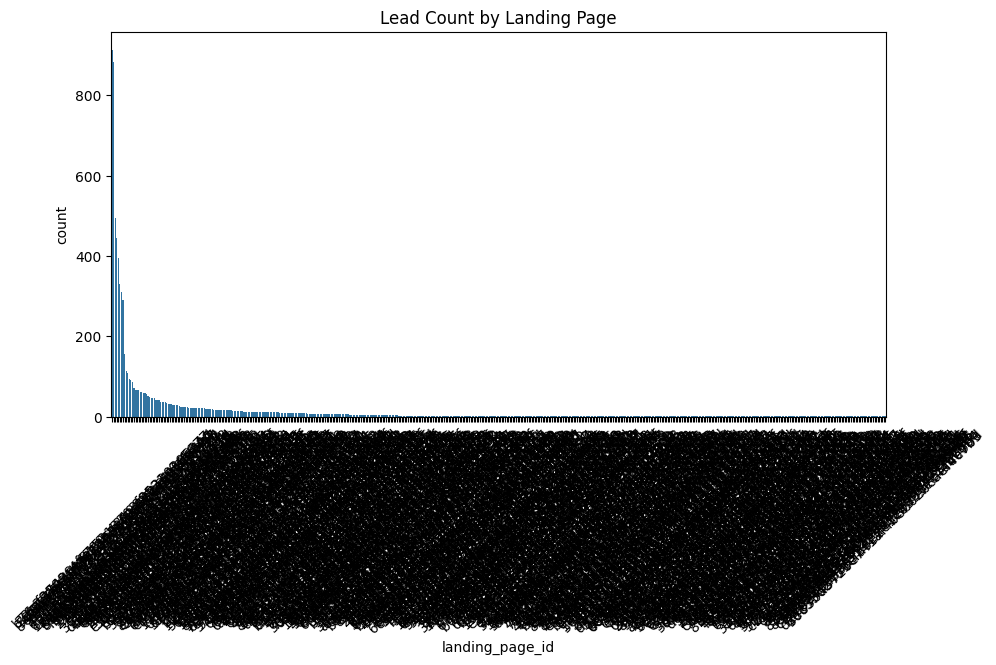

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=mqls, x='landing_page_id', order=mqls['landing_page_id'].value_counts().index)
plt.title("Lead Count by Landing Page")
plt.xticks(rotation=45)
plt.show()


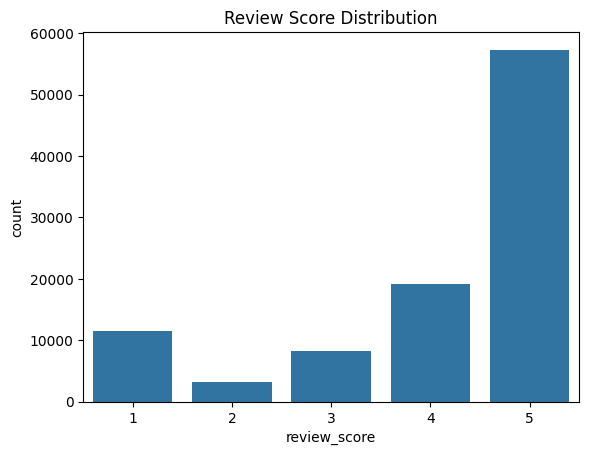

In [13]:
sns.countplot(data=reviews, x='review_score')
plt.title("Review Score Distribution")
plt.show()


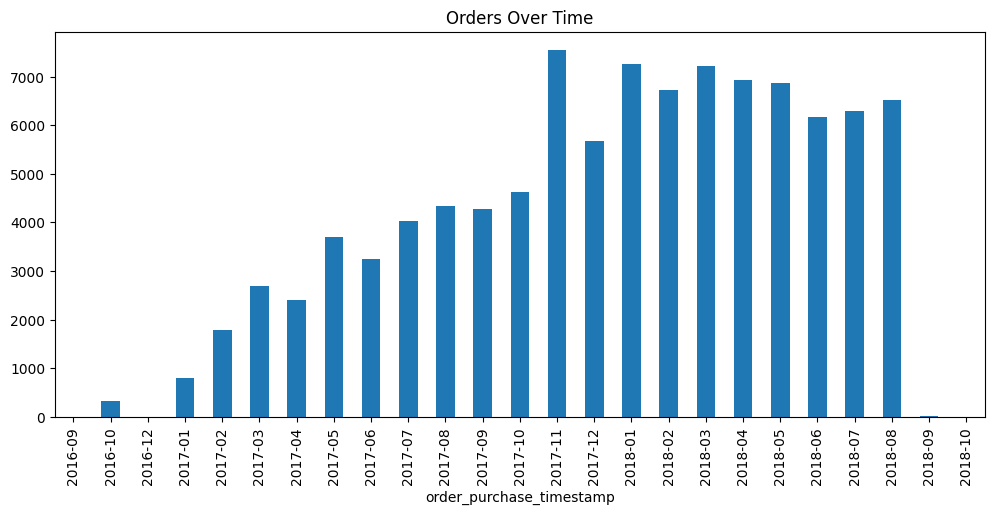

In [14]:
orders['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Orders Over Time")
plt.show()


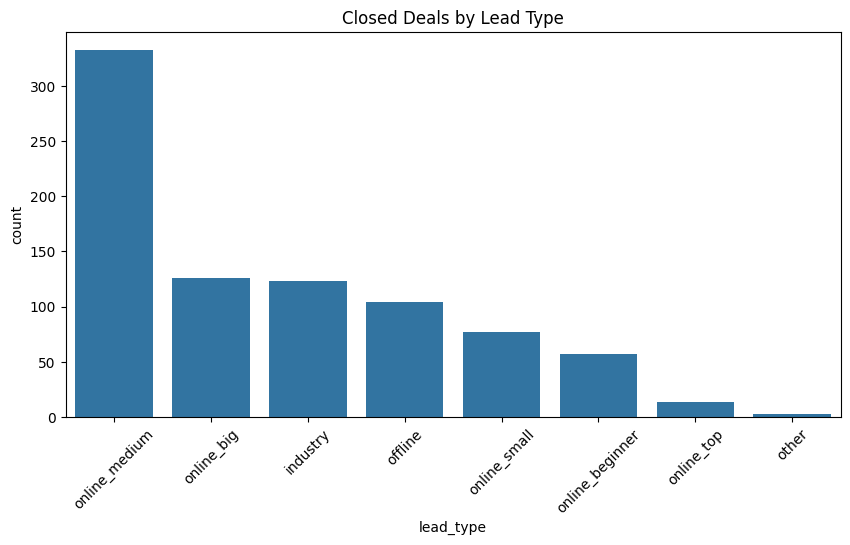

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=closed_deals, x='lead_type', order=closed_deals['lead_type'].value_counts().index)
plt.title("Closed Deals by Lead Type")
plt.xticks(rotation=45)
plt.show()


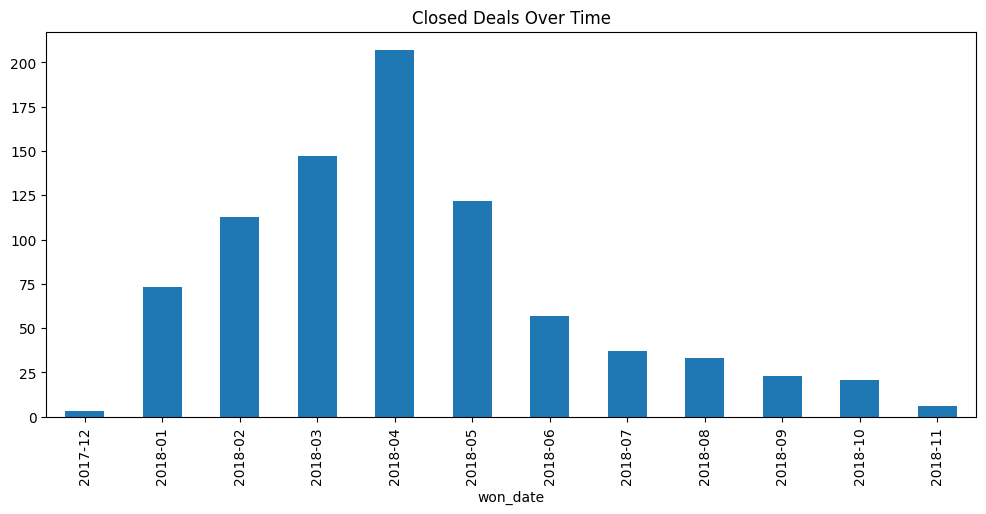

In [16]:
closed_deals['won_date'].dt.to_period('M').value_counts().sort_index().plot(
    kind='bar', figsize=(12,5)
)
plt.title("Closed Deals Over Time")
plt.show()


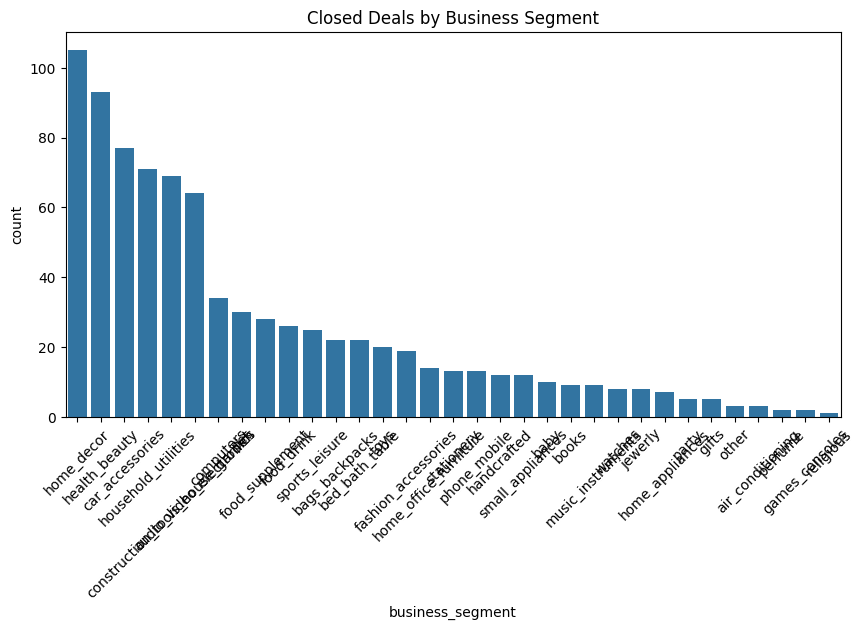

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=closed_deals,
    x='business_segment',
    order=closed_deals['business_segment'].value_counts().index
)
plt.title("Closed Deals by Business Segment")
plt.xticks(rotation=45)
plt.show()


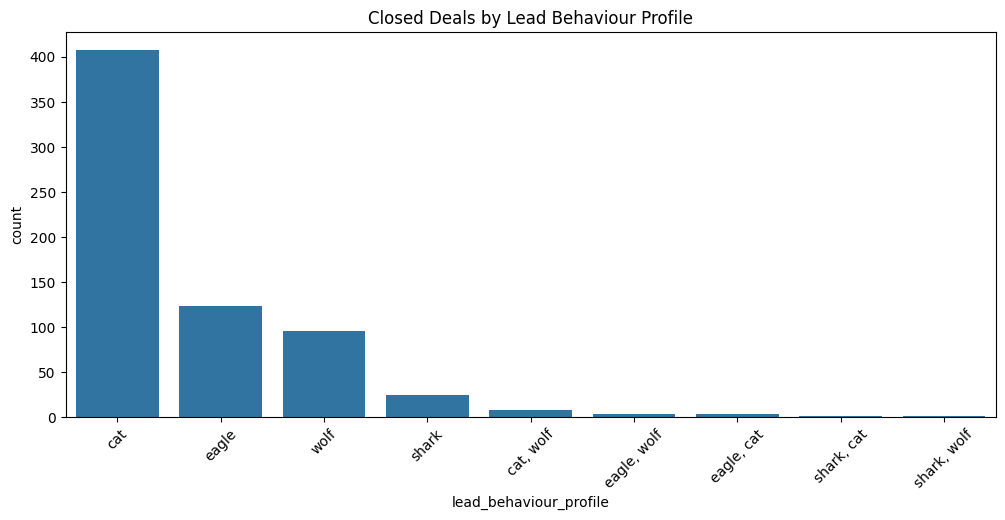

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(
    data=closed_deals,
    x='lead_behaviour_profile',
    order=closed_deals['lead_behaviour_profile'].value_counts().index
)
plt.title("Closed Deals by Lead Behaviour Profile")
plt.xticks(rotation=45)
plt.show()


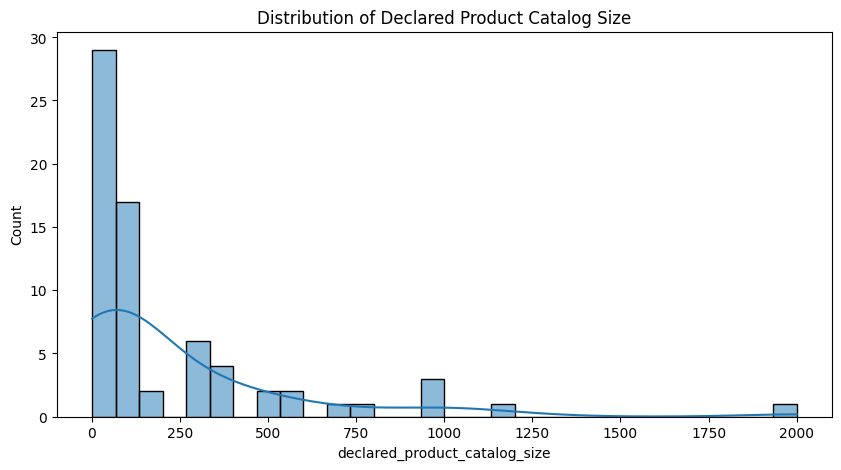

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(closed_deals['declared_product_catalog_size'], bins=30, kde=True)
plt.title("Distribution of Declared Product Catalog Size")
plt.show()


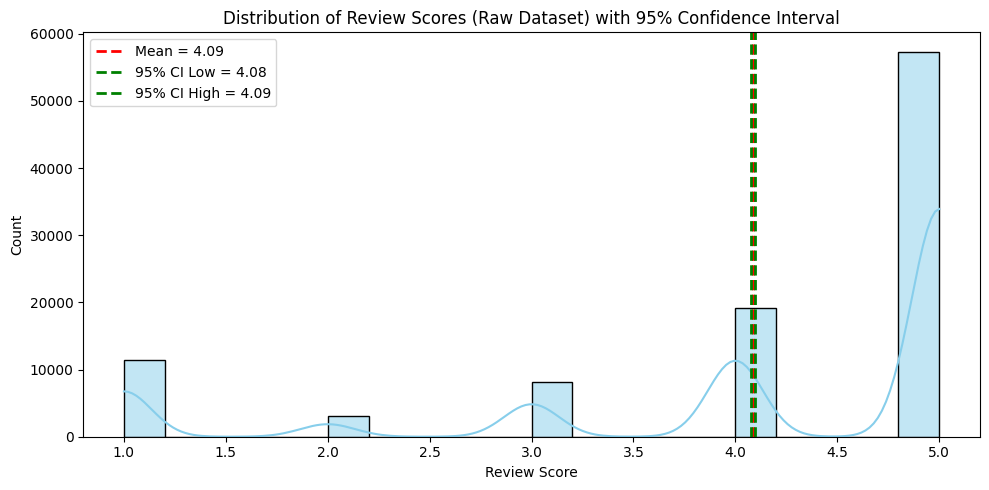

In [20]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Extract raw review scores (one row per review)
ratings_raw = reviews['review_score'].dropna().astype(float)

# Mean and standard error
mean_raw = ratings_raw.mean()
std_error_raw = st.sem(ratings_raw)

# 95% confidence interval
ci_low_raw, ci_high_raw = st.t.interval(
    confidence=0.95,
    df=len(ratings_raw)-1,
    loc=mean_raw,
    scale=std_error_raw
)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings_raw, bins=20, kde=True, color='skyblue', edgecolor='black')

# Add mean line
plt.axvline(mean_raw, color='red', linestyle='--', linewidth=2,
            label=f"Mean = {mean_raw:.2f}")

# Add CI lines
plt.axvline(ci_low_raw, color='green', linestyle='--', linewidth=2,
            label=f"95% CI Low = {ci_low_raw:.2f}")
plt.axvline(ci_high_raw, color='green', linestyle='--', linewidth=2,
            label=f"95% CI High = {ci_high_raw:.2f}")

plt.title("Distribution of Review Scores (Raw Dataset) with 95% Confidence Interval")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# ---------------------------------------------------------
# MERGE MQLs + CLOSED DEALS AND LOAD TO POSTGRES
# INTO funnel_mql_master (for existing dashboard)
# ---------------------------------------------------------

# 1. Start from your already-cleaned dataframes
mqls_clean = mqls.copy()
closed_clean = closed_deals.copy()

# 2. Merge MQLs with Closed Deals
marketing_funnel = mqls_clean.merge(
    closed_clean,
    on="mql_id",
    how="left",
    suffixes=("", "_closed")
)

# 3. Add funnel stage
marketing_funnel["funnel_stage"] = marketing_funnel["won_date"].apply(
    lambda x: "Closed Deal" if pd.notnull(x) else "MQL"
)

# 4. Fix date columns
marketing_funnel["first_contact_date"] = pd.to_datetime(
    marketing_funnel["first_contact_date"], errors="coerce"
).dt.date

marketing_funnel["won_date"] = pd.to_datetime(
    marketing_funnel["won_date"], errors="coerce"
).dt.date

# 5. Load into Postgres with the ORIGINAL table name
engine = create_engine(
    f"postgresql://{POSTGRES_USER}:{POSTGRES_PASS}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
)

with engine.begin() as conn:
    marketing_funnel.to_sql(
        "funnel_mql_master",          # ← keep this name for Tableau
        conn,
        schema=POSTGRES_SCHEMA,       # s_nishantsingh
        if_exists="replace",
        index=False
    )

print("Loaded successfully → s_nishantsingh.funnel_mql_master")


Loaded successfully → s_nishantsingh.funnel_mql_master


In [22]:
# ---------------------------------------------------------
# 1. START WITH CUSTOMERS
# ---------------------------------------------------------

ecom = customers.copy()


# ---------------------------------------------------------
# 2. ADD ORDERS
# ---------------------------------------------------------

ecom = ecom.merge(
    orders,
    on="customer_id",
    how="left"
)


# ---------------------------------------------------------
# 3. ADD ORDER ITEMS
# ---------------------------------------------------------

ecom = ecom.merge(
    order_items,
    on="order_id",
    how="left"
)


# ---------------------------------------------------------
# 4. ADD PRODUCTS
# ---------------------------------------------------------

# ---------------------------------------------------------
# 4. ADD PRODUCTS
# ---------------------------------------------------------

ecom = ecom.merge(
    products,
    on="product_id",
    how="left"
)

# ---------------------------------------------------------
# 4A. TRANSLATE PRODUCT CATEGORY (Portuguese → English)
# ---------------------------------------------------------

category_map = {
    "agro_industria_e_comercio": "Agriculture, Industry & Commerce",
    "alimentos": "Food",
    "alimentos_bebidas": "Food & Beverages",
    "artes": "Arts",
    "artigos_de_festas": "Party Supplies",
    "artigos_de_natal": "Christmas Items",
    "artigos_de_papelaria": "Stationery",
    "automotivo": "Automotive",
    "bebes": "Baby Products",
    "beleza_saude": "Beauty & Health",
    "brinquedos": "Toys",
    "cama_mesa_banho": "Bed, Table & Bath",
    "casa_conforto": "Home Comfort",
    "casa_construcao": "Home Construction",
    "cds_dvds_musicais": "Music CDs & DVDs",
    "cine_foto": "Cinema & Photography",
    "climatizacao": "Air Conditioning",
    "consoles_games": "Consoles & Games",
    "construcao_ferramentas_construcao": "Construction Tools",
    "construcao_ferramentas_ferramentas": "Tools",
    "construcao_ferramentas_iluminacao": "Lighting",
    "construcao_ferramentas_jardim": "Garden Tools",
    "cool_stuff": "Cool Stuff",
    "dvds_blu_ray": "DVDs & Blu-ray",
    "eletrodomesticos": "Home Appliances",
    "eletrodomesticos_2": "Home Appliances (Other)",
    "eletroportateis": "Portable Electronics",
    "eletronicos": "Electronics",
    "esporte_lazer": "Sports & Leisure",
    "fashion_calcados": "Fashion Shoes",
    "fashion_bolsas_e_acessorios": "Fashion Bags & Accessories",
    "fashion_esporte": "Sports Fashion",
    "fashion_roupa_feminina": "Women's Clothing",
    "fashion_roupa_infantil": "Children's Clothing",
    "fashion_roupa_masculina": "Men's Clothing",
    "fashion_underwear_e_moda_praia": "Underwear & Beachwear",
    "ferramentas_jardim": "Garden Tools",
    "flores": "Flowers",
    "frutas": "Fruits",
    "industria_comercio_e_negocios": "Industry & Business",
    "informatica_acessorios": "Computers & Accessories",
    "instrumentos_musicais": "Musical Instruments",
    "joias": "Jewelry",
    "livros_interesse_geral": "General Books",
    "livros_tecnicos": "Technical Books",
    "livros_importados": "Imported Books",
    "malas_acessorios": "Bags & Accessories",
    "market_place": "Marketplace",
    "material_escolar": "School Supplies",
    "moveis_decoracao": "Furniture & Decoration",
    "moveis_colchao_e_estofado": "Mattresses & Upholstery",
    "moveis_escritorio": "Office Furniture",
    "moveis_quarto": "Bedroom Furniture",
    "moveis_sala": "Living Room Furniture",
    "musica": "Music",
    "papelaria": "Stationery",
    "pcs": "PCs",
    "perfumaria": "Perfumery",
    "pet_shop": "Pet Shop",
    "relogios_presentes": "Watches & Gifts",
    "seguros_e_servicos": "Insurance & Services",
    "servicos": "Services",
    "sinalizacao_e_seguranca": "Signaling & Safety",
    "tablets_impressao_imagem": "Tablets, Printing & Imaging",
    "telefonia": "Telephony",
    "telefonia_fixa": "Landline Phones",
    "utilidades_domesticas": "Home Utilities"
}

ecom["product_category_english"] = (
    ecom["product_category_name"]
    .map(category_map)
    .fillna(ecom["product_category_name"])
)



# ---------------------------------------------------------
# 5. ADD SELLERS
# ---------------------------------------------------------

ecom = ecom.merge(
    sellers,
    on="seller_id",
    how="left",
    suffixes=("", "_seller")
)


# ---------------------------------------------------------
# 6. ADD PAYMENTS
# ---------------------------------------------------------

ecom = ecom.merge(
    payments,
    on="order_id",
    how="left",
    suffixes=("", "_payment")
)


# ---------------------------------------------------------
# 7. ADD REVIEWS
# ---------------------------------------------------------

ecom = ecom.merge(
    reviews,
    on="order_id",
    how="left",
    suffixes=("", "_review")
)


# ---------------------------------------------------------
# 8. FIX DATE COLUMNS
# ---------------------------------------------------------

date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_customer_date",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
    "review_creation_date",
    "review_answer_timestamp"
]

for col in date_cols:
    if col in ecom.columns:
        ecom[col] = pd.to_datetime(ecom[col], errors="coerce").dt.date


# ---------------------------------------------------------
# 9. CREATE CUSTOMER TYPE (NEW vs REPEAT)
# ---------------------------------------------------------

# Count distinct orders per customer
order_counts = (
    ecom.groupby("customer_id")["order_id"]
        .nunique()
        .reset_index(name="order_count")
)

# Assign customer type
order_counts["customer_type"] = order_counts["order_count"].apply(
    lambda x: "New" if x == 1 else "Repeat"
)

# Merge back into main dataset
ecom = ecom.merge(
    order_counts[["customer_id", "customer_type"]],
    on="customer_id",
    how="left"
)


# ---------------------------------------------------------
# 10. LOAD INTO POSTGRES
# ---------------------------------------------------------

with engine.begin() as conn:
    ecom.to_sql(
        "ecommerce_master",
        conn,
        schema=POSTGRES_SCHEMA,
        if_exists="replace",
        index=False
    )

print("Loaded: ecommerce_master")


Loaded: ecommerce_master


In [23]:
mqls['first_contact_date'].unique()[:20]


<DatetimeArray>
['2018-02-01 00:00:00', '2017-10-20 00:00:00', '2018-03-22 00:00:00',
 '2018-01-22 00:00:00', '2018-02-21 00:00:00', '2018-01-14 00:00:00',
 '2018-05-15 00:00:00', '2018-05-24 00:00:00', '2017-11-10 00:00:00',
 '2017-12-25 00:00:00', '2018-01-24 00:00:00', '2018-04-30 00:00:00',
 '2018-04-04 00:00:00', '2018-05-23 00:00:00', '2018-04-03 00:00:00',
 '2017-12-08 00:00:00', '2018-02-16 00:00:00', '2018-01-13 00:00:00',
 '2018-01-15 00:00:00', '2018-02-23 00:00:00']
Length: 20, dtype: datetime64[ns]

In [24]:
mqls.head()
mqls.info()
mqls['first_contact_date'].unique()[:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


<DatetimeArray>
['2018-02-01 00:00:00', '2017-10-20 00:00:00', '2018-03-22 00:00:00',
 '2018-01-22 00:00:00', '2018-02-21 00:00:00', '2018-01-14 00:00:00',
 '2018-05-15 00:00:00', '2018-05-24 00:00:00', '2017-11-10 00:00:00',
 '2017-12-25 00:00:00', '2018-01-24 00:00:00', '2018-04-30 00:00:00',
 '2018-04-04 00:00:00', '2018-05-23 00:00:00', '2018-04-03 00:00:00',
 '2017-12-08 00:00:00', '2018-02-16 00:00:00', '2018-01-13 00:00:00',
 '2018-01-15 00:00:00', '2018-02-23 00:00:00']
Length: 20, dtype: datetime64[ns]

In [25]:
ecom["customer_type"].value_counts()


customer_type
New    119143
Name: count, dtype: int64

In [26]:
orders.groupby("customer_id")["order_id"].nunique().value_counts()


order_id
1    99441
Name: count, dtype: int64

In [27]:
orders.groupby("customer_id")["order_id"].nunique().max()


np.int64(1)

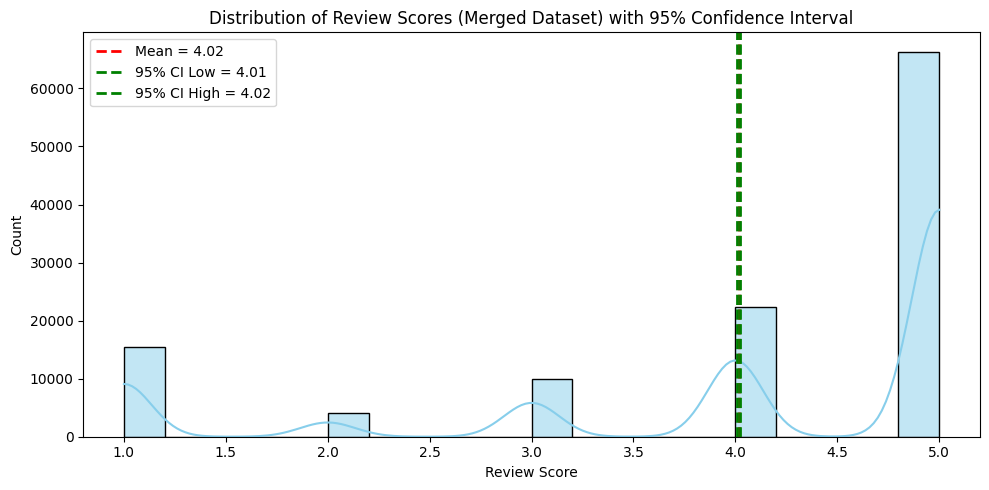

In [28]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Extract review scores from merged dataset
ratings_merged = ecom['review_score'].dropna().astype(float)

# Mean and standard error
mean_rating_merged = ratings_merged.mean()
std_error_merged = st.sem(ratings_merged)

# 95% confidence interval
ci_low_merged, ci_high_merged = st.t.interval(
    confidence=0.95,
    df=len(ratings_merged)-1,
    loc=mean_rating_merged,
    scale=std_error_merged
)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings_merged, bins=20, kde=True, color='skyblue', edgecolor='black')

# Add mean line
plt.axvline(mean_rating_merged, color='red', linestyle='--', linewidth=2,
            label=f"Mean = {mean_rating_merged:.2f}")

# Add CI lines
plt.axvline(ci_low_merged, color='green', linestyle='--', linewidth=2,
            label=f"95% CI Low = {ci_low_merged:.2f}")
plt.axvline(ci_high_merged, color='green', linestyle='--', linewidth=2,
            label=f"95% CI High = {ci_high_merged:.2f}")

plt.title("Distribution of Review Scores (Merged Dataset) with 95% Confidence Interval")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
